In [11]:
import numpy as np

N = 10
D = 20
X = np.random.random((N, D))
X = np.concatenate((X, X + 0.01, X + 0.02))
X.shape

(30, 20)

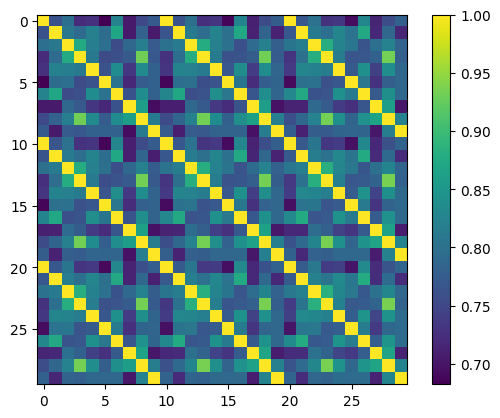

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

plt.imshow(cosine_similarity(X))
plt.colorbar()

/home/jj/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jj/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


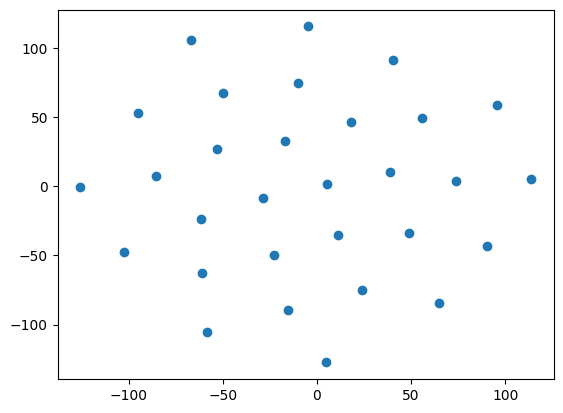

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE()
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

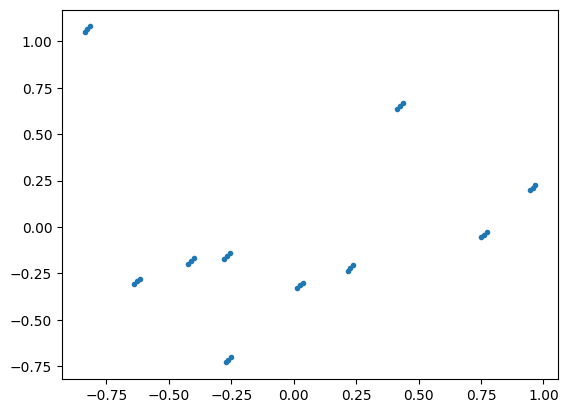

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.')

In [25]:
!pip install dppy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 2.0 MB/s eta 0:00:000:00:01


In [27]:
import numpy as np
from dppy.finite_dpps import FiniteDPP

rng = np.random.RandomState(1)

# r, N = 5, 10
# Random feature vectors
Phi = X
DPP = FiniteDPP('likelihood', **{'L': Phi.T.dot(Phi)})

k = 4
for _ in range(10):
    DPP.sample_exact_k_dpp(size=k, random_state=rng)

print(DPP.list_of_samples)

[[1, 4, 9, 7], [12, 8, 10, 0], [3, 18, 1, 9], [14, 19, 13, 3], [2, 0, 14, 6], [12, 15, 1, 5], [3, 16, 10, 6], [6, 18, 8, 17], [4, 17, 11, 1], [18, 13, 19, 8]]


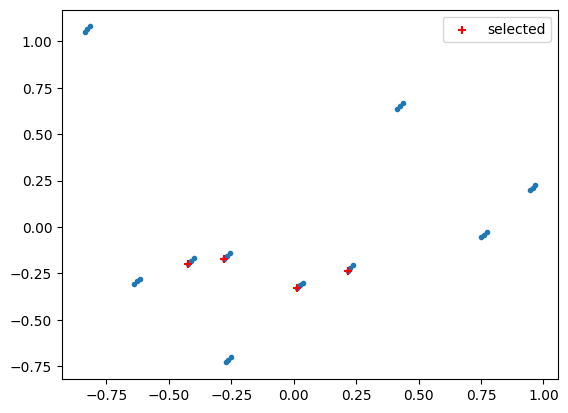

In [29]:
subset = DPP.list_of_samples[0]
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.')
plt.scatter(X_pca[subset, 0], X_pca[subset, 1], marker='+', c='red', label='selected')
plt.legend()

In [33]:
XS = X[subset]
XS.shape

(4, 20)

In [34]:
Lmod = X @ X.T - (X @ XS.T) @ np.linalg.inv(XS @ XS.T) @ (XS @ X.T)
Lmod.shape

(30, 30)

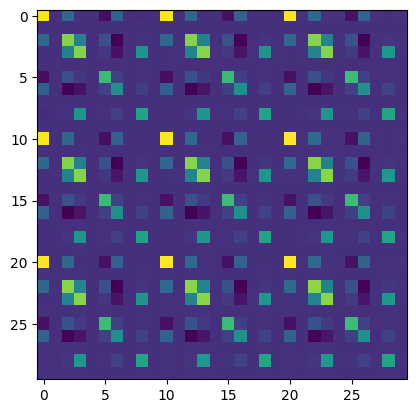

In [36]:
plt.imshow(Lmod)

In [37]:
DPP = FiniteDPP('likelihood', **{'L': Lmod})

k = 4
for _ in range(10):
    DPP.sample_exact_k_dpp(size=k, random_state=rng)

print(DPP.list_of_samples)

[[28, 22, 3, 5], [15, 22, 0, 8], [23, 12, 28, 25], [0, 3, 5, 22], [3, 6, 20, 2], [16, 23, 5, 2], [8, 26, 15, 10], [0, 12, 18, 5], [18, 12, 26, 0], [6, 18, 23, 20]]


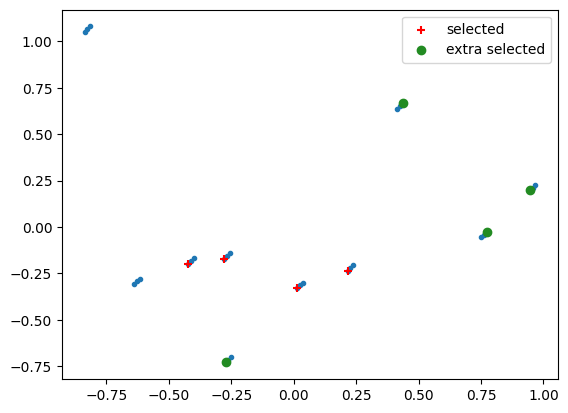

In [38]:
extra_subset = DPP.list_of_samples[0]
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.')
plt.scatter(X_pca[subset, 0], X_pca[subset, 1], marker='+', c='red', label='selected')
plt.scatter(X_pca[extra_subset, 0], X_pca[extra_subset, 1], marker='o', c='forestgreen', label='extra selected')
plt.legend()